In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Hipertension_Arterial_Mexico.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FOLIO_I                        4363 non-null   object 
 1   sex                            4363 non-null   int64  
 2   age                            4363 non-null   int64  
 3   hemoglobin_concentration       4363 non-null   float64
 4   room_temperature               4363 non-null   int64  
 5   uric_acid_value                4363 non-null   float64
 6   albumin_value                  4363 non-null   float64
 7   hdl_cholesterol_value          4363 non-null   int64  
 8   ldl_cholesterol_value          4363 non-null   float64
 9   total_cholesterol_value        4363 non-null   int64  
 10  creatine_value                 4363 non-null   float64
 11  glucose_result                 4363 non-null   float64
 12  insulin_value                  4363 non-null   f

In [ ]:
data.isnull().sum()

FOLIO_I                          0
sex                              0
age                              0
hemoglobin_concentration         0
room_temperature                 0
uric_acid_value                  0
albumin_value                    0
hdl_cholesterol_value            0
ldl_cholesterol_value            0
total_cholesterol_value          0
creatine_value                   0
glucose_result                   0
insulin_value                    0
triglycerides_value              0
average_glucose_result           0
glycosylated_hemoglobin_value    0
ferritin_value                   0
folate_value                     0
valor_homocysteine               0
valor_proteinac_reactiva         0
transferrin_value                0
vitamin_bdoce_value              0
vitamin_d_value                  0
weight                           0
height                           0
waist_measurement                0
secondmeasurement_weight         0
secondmeasurement_height         0
knee_heel_distance  

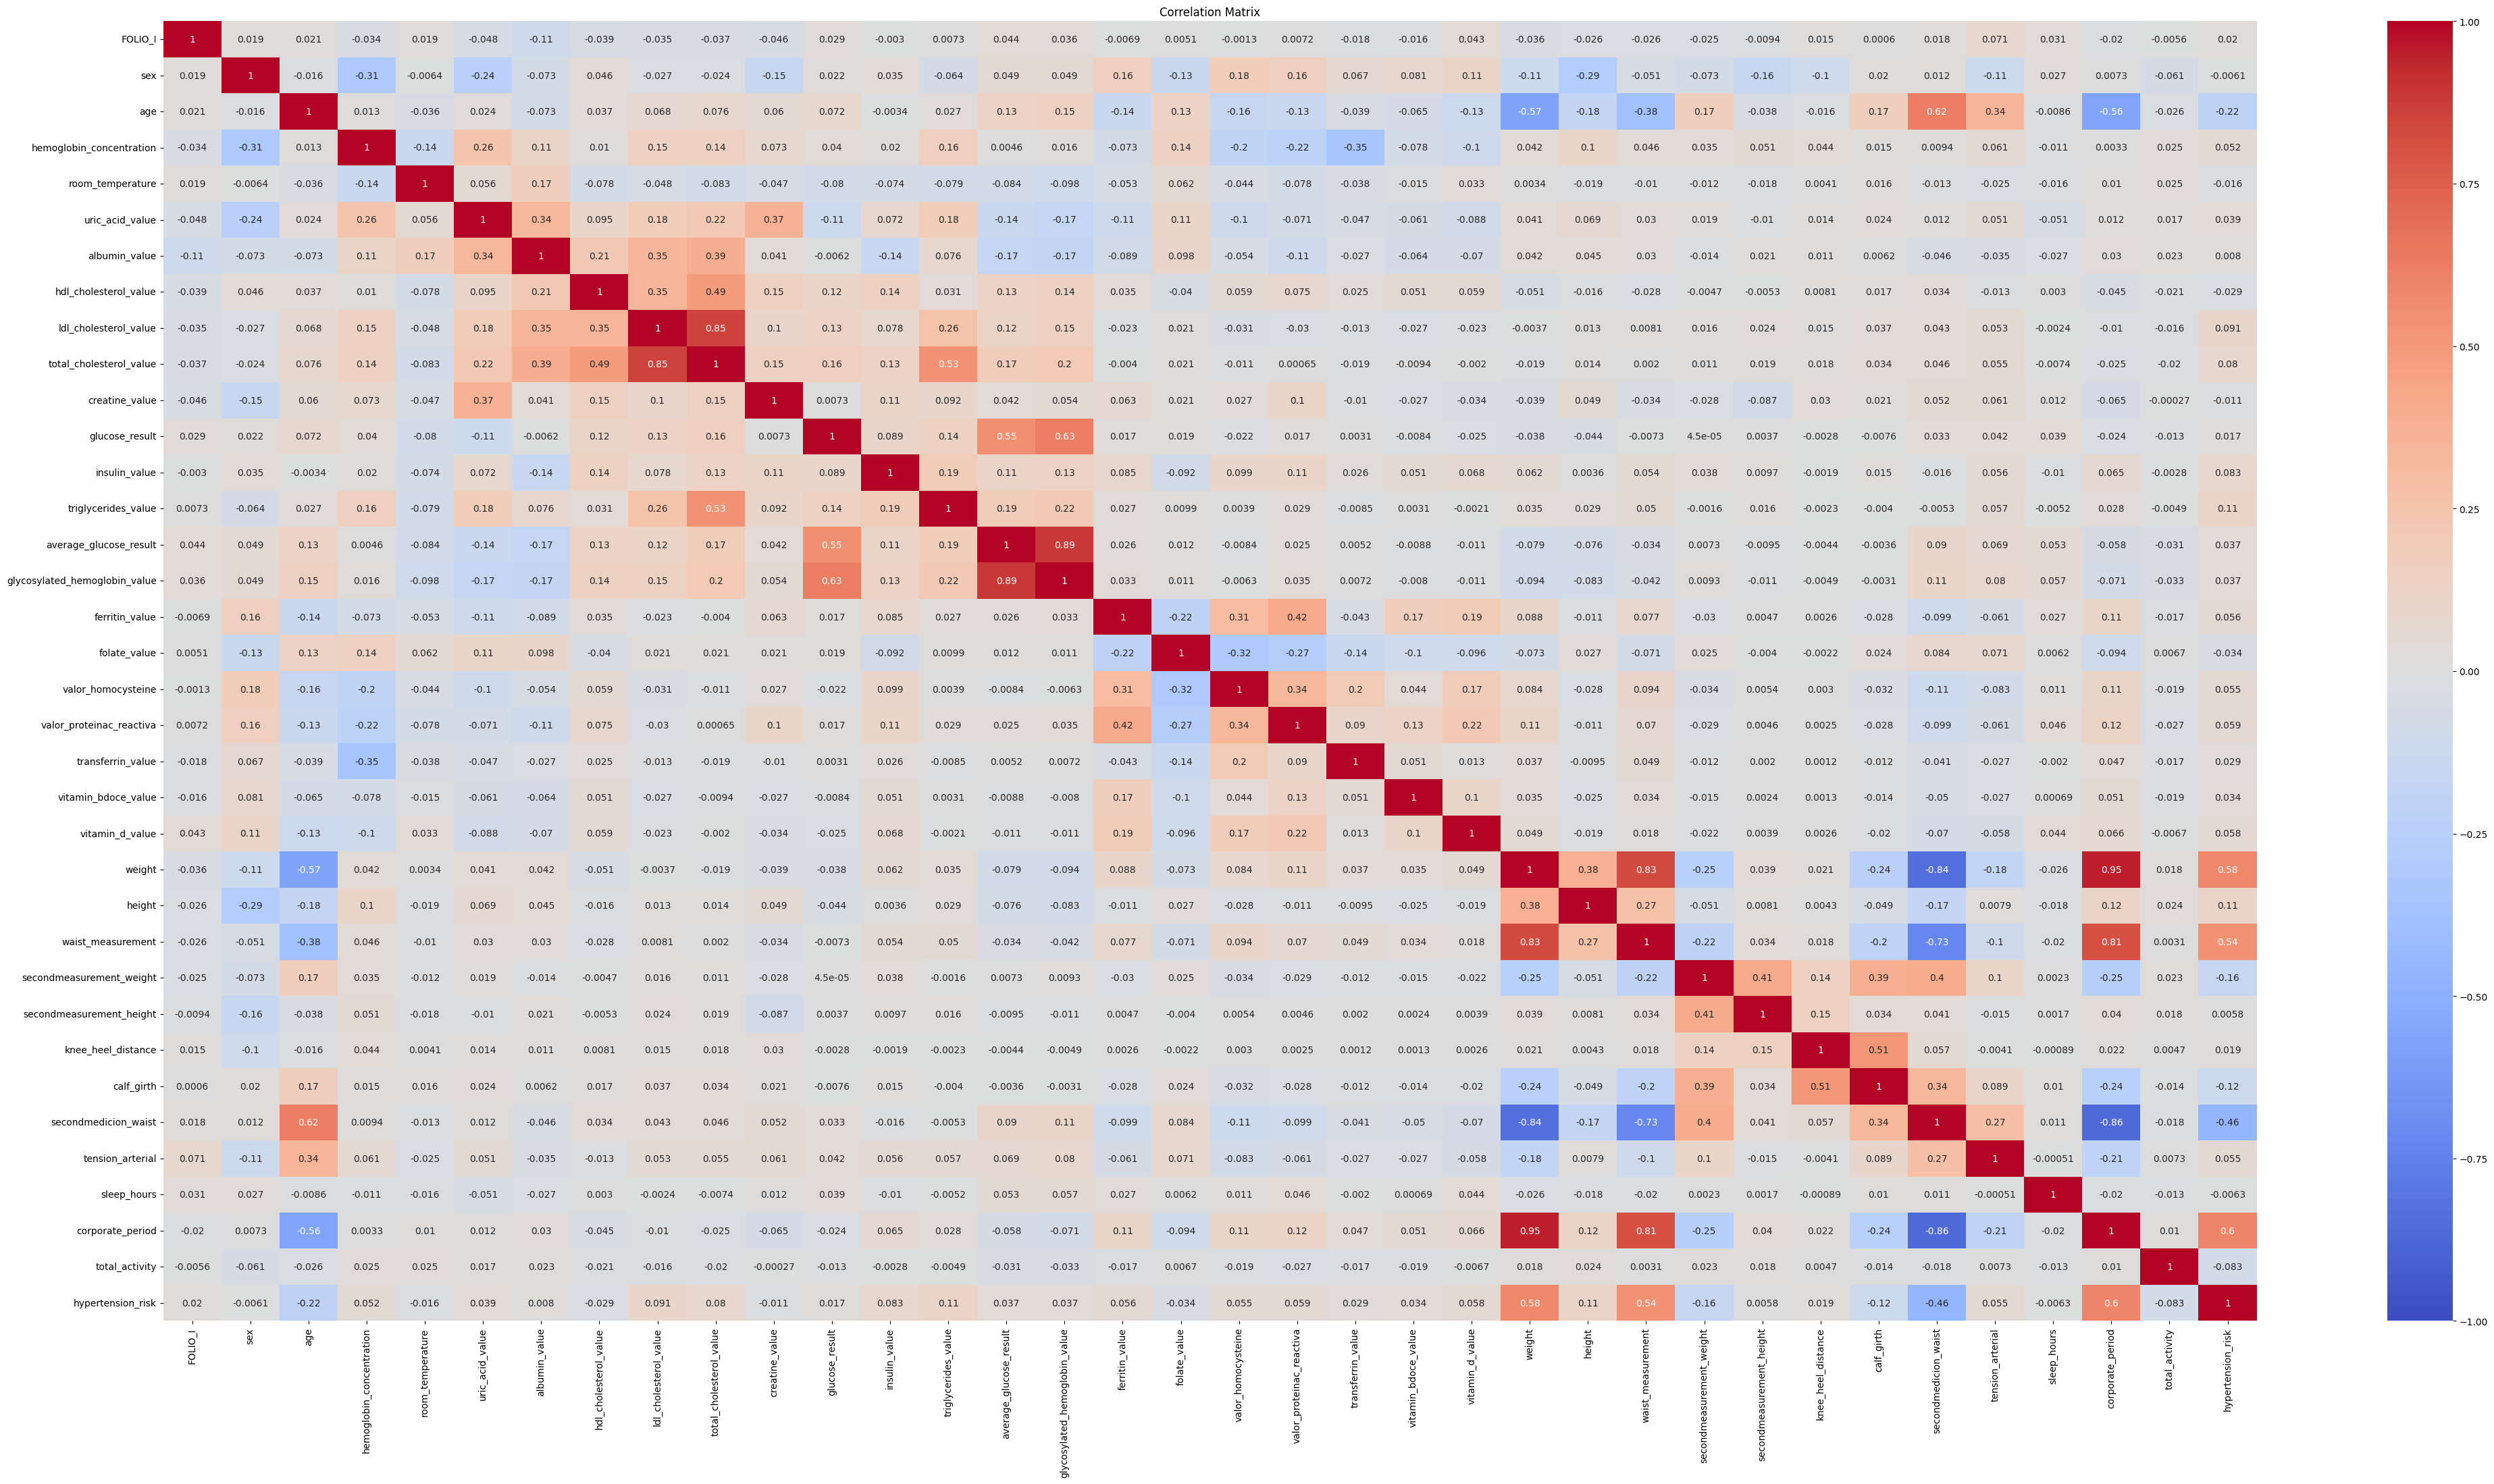

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(50, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


## New Section

In [ ]:
data.drop(['FOLIO_I', 'room_temperature', 'waist_measurement',
           'albumin_value', 'triglycerides_value', 'creatine_value',
           'vitamin_bdoce_value', 'vitamin_d_value', 'folate_value',
           'average_glucose_result', 'valor_proteinac_reactiva',
           'valor_homocysteine',  'transferrin_value',
           'secondmeasurement_weight', 'secondmeasurement_height',
           'knee_heel_distance', 'calf_girth', 'secondmedicion_waist',
           'ldl_cholesterol_value', 'height'], axis=1, inplace=True)

In [ ]:
# Fungsi naik untuk menghitung nilai keanggotaan fuzzy
def fuzzy_naik(x, a, b):
    if x <= a:
        return 0
    elif x >= b:
        return 1
    else:
        return (x - a) / (b - a)

# Tentukan nilai min dan max dari setiap atribut
min_values = data.min()
max_values = data.max()

# Menghitung nilai fuzzy untuk setiap data dalam atribut
fuzzy_values = []
for col in data.columns:
    min_val = min_values[col]
    max_val = max_values[col]
    fuzzy_col = [fuzzy_naik(x, min_val, max_val) for x in data[col]]
    fuzzy_values.append(fuzzy_col)

# Membuat data frame 'df_fuzzy' menggunakan 'pd.DataFrame()'
fuzzy_values = list(zip(*fuzzy_values))
df_fuzzy = pd.DataFrame(fuzzy_values, columns=data.columns)

print(df_fuzzy.head())

   sex       age  hemoglobin_concentration  uric_acid_value  \
0    1  0.415730                  0.604167         0.425926   
1    1  0.685393                  0.597222         0.388889   
2    1  0.719101                  0.604167         0.425926   
3    0  0.348315                  0.708333         0.583333   
4    1  0.685393                  0.500000         0.370370   

   hdl_cholesterol_value  total_cholesterol_value  glucose_result  \
0               0.092593                 0.154446        0.034553   
1               0.237037                 0.330733        0.042598   
2               0.092593                 0.154446        0.034553   
3               0.148148                 0.254290        0.040481   
4               0.118519                 0.163807        0.041751   

   insulin_value  glycosylated_hemoglobin_value  ferritin_value    weight  \
0       0.012903                       0.097744        0.003265  0.434952   
1       0.033397                       0.172932     

In [ ]:
df_fuzzy

,sex,age,hemoglobin_concentration,uric_acid_value,hdl_cholesterol_value,total_cholesterol_value,glucose_result,insulin_value,glycosylated_hemoglobin_value,ferritin_value,weight,tension_arterial,sleep_hours,corporate_period,total_activity,hypertension_risk
0,1,0.415730,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.434952,0.535,0.030612,0.535835,0.006176,1
1,1,0.685393,0.597222,0.388889,0.237037,0.330733,0.042598,0.033397,0.172932,0.003265,0.000000,0.520,0.010204,0.000000,0.012914,0
2,1,0.719101,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.000000,0.525,0.000000,0.000000,0.026390,0
3,0,0.348315,0.708333,0.583333,0.148148,0.254290,0.040481,0.025806,0.105263,0.003265,0.476619,0.585,0.040816,0.424531,0.014879,1
4,1,0.685393,0.500000,0.370370,0.118519,0.163807,0.041751,0.061860,0.233083,0.003265,0.000000,0.615,0.010204,0.000000,0.013756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,1,0.651685,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.000000,0.625,0.030612,0.000000,0.015160,0
4359,0,0.393258,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.325240,0.650,0.030612,0.305708,0.043234,0
4360,1,0.730337,0.722222,0.250000,0.044444,0.053042,0.025237,0.051233,0.105263,0.003265,0.000000,0.735,0.030612,0.000000,0.016283,0
4361,0,0.707865,0.840278,0.490741,0.129630,0.204368,0.033283,0.020873,0.105263,0.003265,0.000000,0.540,0.010204,0.000000,0.012914,0


In [ ]:
target = 'hypertension_risk'
data = df_fuzzy.drop(['hypertension_risk'],axis=1)

x = data
y = df_fuzzy[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data

,sex,age,hemoglobin_concentration,uric_acid_value,hdl_cholesterol_value,total_cholesterol_value,glucose_result,insulin_value,glycosylated_hemoglobin_value,ferritin_value,weight,tension_arterial,sleep_hours,corporate_period,total_activity,hypertension_risk
3902,1,0.685393,0.652778,0.268519,0.174074,0.291732,0.037940,0.037192,0.135338,0.003265,0.000000,0.585,0.020408,0.000000,0.029759,0
2358,0,0.662921,0.708333,0.703704,0.125926,0.185647,0.113736,0.003036,0.586466,0.003265,0.000000,0.615,0.020408,0.000000,0.023021,1
1936,1,0.606742,0.645833,0.416667,0.103704,0.221529,0.032859,0.023529,0.097744,0.003265,0.386091,0.615,0.010204,0.471057,0.036496,1
113,0,0.460674,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.587530,0.575,0.030612,0.531914,0.017967,1
2176,0,0.393258,0.715278,0.592593,0.218519,0.290172,0.034553,0.044023,0.105263,0.003265,0.472722,0.545,0.020408,0.487245,0.029759,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0.561798,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.363010,0.575,0.030612,0.336878,0.039865,0
466,0,0.494382,0.715278,0.518519,0.114815,0.185647,0.037940,0.236812,0.135338,0.003265,0.522182,0.580,0.020408,0.487337,0.017967,1
3092,1,0.550562,0.729167,0.314815,0.122222,0.135725,0.046409,0.612903,0.097744,0.003265,0.385492,0.760,0.030612,0.524806,0.041550,1
3772,0,0.280899,0.826389,0.425926,0.133333,0.276131,0.033706,0.067552,0.067669,0.003265,0.592926,0.690,0.010204,0.539344,0.022459,1


In [ ]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data

,sex,age,hemoglobin_concentration,uric_acid_value,hdl_cholesterol_value,total_cholesterol_value,glucose_result,insulin_value,glycosylated_hemoglobin_value,ferritin_value,weight,tension_arterial,sleep_hours,corporate_period,total_activity,hypertension_risk
179,0,0.224719,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.604017,0.585,0.030612,0.540706,0.026390,1
3168,0,0.505618,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.523082,0.615,0.000000,0.484747,0.028355,1
2741,1,0.471910,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.449041,0.655,0.000000,0.556949,0.039865,1
2191,1,0.325843,0.618056,0.370370,0.140741,0.171607,0.035400,0.017078,0.097744,0.119837,0.303957,0.465,0.030612,0.342600,0.004492,1
1578,0,0.685393,0.722222,0.481481,0.107407,0.140406,0.036670,0.019355,0.165414,0.003265,0.000000,0.755,0.010204,0.000000,0.029759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0,0.202247,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.270384,0.550,0.040816,0.273615,0.008703,1
1657,1,0.337079,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.365707,0.510,0.030612,0.416484,0.019652,1
2083,1,0.651685,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.000000,0.785,0.040816,0.000000,0.011679,0
682,1,0.494382,0.604167,0.425926,0.092593,0.154446,0.034553,0.012903,0.097744,0.003265,0.445444,0.680,0.030612,0.521196,0.007019,1


In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.73      0.72      0.73       309
     Class 1       0.85      0.85      0.85       564

    accuracy                           0.81       873
   macro avg       0.79      0.79      0.79       873
weighted avg       0.81      0.81      0.81       873



# **MINMAX SCALLER + FUNGSI FUZZY NAIK**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


data = pd.read_csv('Hipertension_Arterial_Mexico.csv')


data.info()
print(data.isnull().sum())


data.drop(['FOLIO_I', 'room_temperature', 'waist_measurement',
           'albumin_value', 'triglycerides_value', 'creatine_value',
           'vitamin_bdoce_value', 'vitamin_d_value', 'folate_value',
           'average_glucose_result', 'valor_proteinac_reactiva',
           'valor_homocysteine',  'transferrin_value',
           'secondmeasurement_weight', 'secondmeasurement_height',
           'knee_heel_distance', 'calf_girth', 'secondmedicion_waist',
           'ldl_cholesterol_value', 'height'], axis=1, inplace=True)


def fuzzy_naik(x, a, b):
    if x <= a:
        return 0
    elif x >= b:
        return 1
    else:
        return (x - a) / (b - a)


min_values = data.min()
max_values = data.max()


fuzzy_values = []
for col in data.columns:
    min_val = min_values[col]
    max_val = max_values[col]
    fuzzy_col = [fuzzy_naik(x, min_val, max_val) for x in data[col]]
    fuzzy_values.append(fuzzy_col)


fuzzy_values = list(zip(*fuzzy_values))
df_fuzzy = pd.DataFrame(fuzzy_values, columns=data.columns)

print(df_fuzzy.head())


target = 'hypertension_risk'


X = df_fuzzy.drop([target], axis=1)
y = df_fuzzy[target]

# Terapkan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Konversi data yang telah diskalakan kembali ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FOLIO_I                        4363 non-null   object 
 1   sex                            4363 non-null   int64  
 2   age                            4363 non-null   int64  
 3   hemoglobin_concentration       4363 non-null   float64
 4   room_temperature               4363 non-null   int64  
 5   uric_acid_value                4363 non-null   float64
 6   albumin_value                  4363 non-null   float64
 7   hdl_cholesterol_value          4363 non-null   int64  
 8   ldl_cholesterol_value          4363 non-null   float64
 9   total_cholesterol_value        4363 non-null   int64  
 10  creatine_value                 4363 non-null   float64
 11  glucose_result                 4363 non-null   float64
 12  insulin_value                  4363 non-null   f

# **MINMAX SCALLER AJA**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('Hipertension_Arterial_Mexico.csv')


data.info()
data.isnull().sum()


data.drop(['FOLIO_I', 'room_temperature', 'waist_measurement',
           'albumin_value', 'triglycerides_value', 'creatine_value',
           'vitamin_bdoce_value', 'vitamin_d_value', 'folate_value',
           'average_glucose_result', 'valor_proteinac_reactiva',
           'valor_homocysteine',  'transferrin_value',
           'secondmeasurement_weight', 'secondmeasurement_height',
           'knee_heel_distance', 'calf_girth', 'secondmedicion_waist',
           'ldl_cholesterol_value', 'height'], axis=1, inplace=True)

# Tentukan target variabel
target = 'hypertension_risk'

# Pisahkan fitur dan target
X = data.drop([target], axis=1)
y = data[target]

# Terapkan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = GaussianNB()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FOLIO_I                        4363 non-null   object 
 1   sex                            4363 non-null   int64  
 2   age                            4363 non-null   int64  
 3   hemoglobin_concentration       4363 non-null   float64
 4   room_temperature               4363 non-null   int64  
 5   uric_acid_value                4363 non-null   float64
 6   albumin_value                  4363 non-null   float64
 7   hdl_cholesterol_value          4363 non-null   int64  
 8   ldl_cholesterol_value          4363 non-null   float64
 9   total_cholesterol_value        4363 non-null   int64  
 10  creatine_value                 4363 non-null   float64
 11  glucose_result                 4363 non-null   float64
 12  insulin_value                  4363 non-null   f